In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import QuantileTransformer, Normalizer, MinMaxScaler
# from sklearn.pipeline import make_pipeline

from sklearn.utils.validation import check_is_fitted

from fit_util import *
from plot_util import *

<img src="task 3.png">

### Data preparation

(70000, 784)


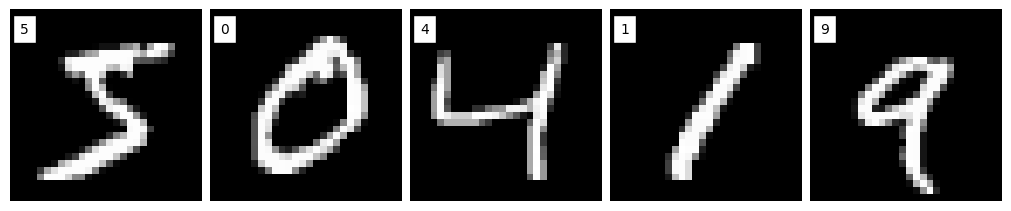

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, data_home='./data/')
print(X.shape)
plot_samples(X, y)

In [3]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [4]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=20000, test_size=5000, random_state=0)

### Logistic regression

In [5]:
lr = LogisticRegression(max_iter=1000)
lr_scores = fit_validate(lr, X_train, X_test, y_train, y_test, n_jobs=14)
check_is_fitted(lr)
print("Mean acc is: %1.2f" % (np.mean(lr_scores)))

Mean acc is: 0.89


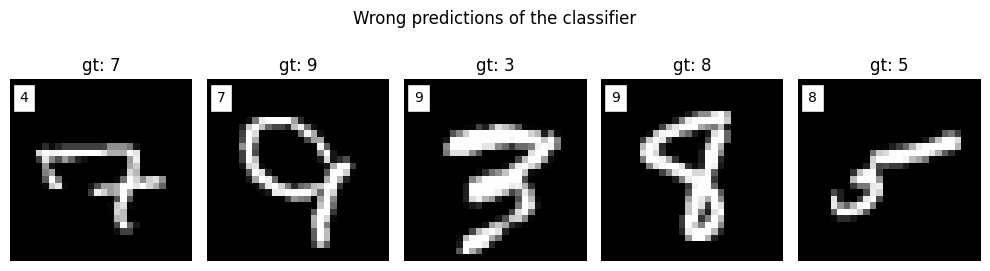

In [6]:
lr_pred = lr.predict(X_test)
plot_errors(X_test, y_test, lr_pred)
# plot_confusion_matrix(lr, lr_pred, y_test)

### Decision tree

In [7]:
dt = DecisionTreeClassifier(max_depth=25)
dt_scores = fit_validate(dt, X_train, X_test, y_train, y_test, n_jobs=14)
check_is_fitted(dt)
print("Mean acc is: %1.2f" % (np.mean(dt_scores)))

Mean acc is: 0.76


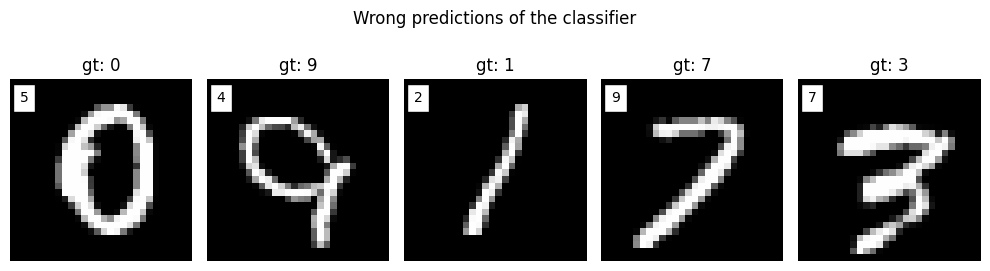

In [8]:
dt_pred = dt.predict(X_test)
plot_errors(X_test, y_test, dt_pred)
# plot_confusion_matrix(lr, dt_pred, y_test)

### Random forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=14)
rf_scores = fit_validate(rf, X_train, X_test, y_train, y_test, n_jobs=14)
check_is_fitted(rf)
print("Mean acc is: %1.2f" % (np.mean(rf_scores)))

Mean acc is: 0.93


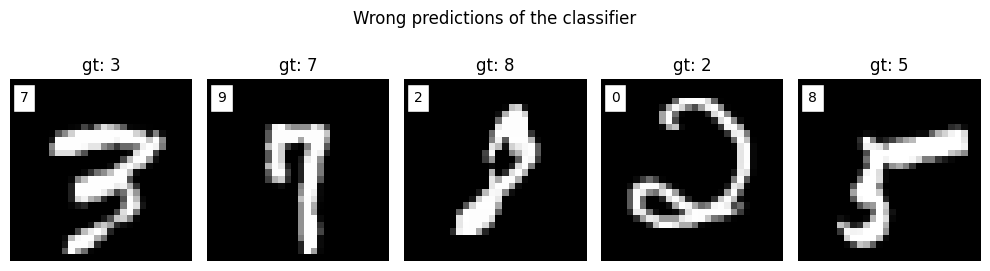

In [10]:
rf_pred = rf.predict(X_test)
plot_errors(X_test, y_test, rf_pred)
# plot_confusion_matrix(lr, rf_pred, y_test)

### Support vector machine

In [11]:
svm = LinearSVC(max_iter=10000)
svm_scores = fit_validate(svm, X_train, X_test, y_train, y_test, n_jobs=14)
check_is_fitted(svm)
print("Mean acc is: %1.2f" % (np.mean(svm_scores)))

Mean acc is: 0.86


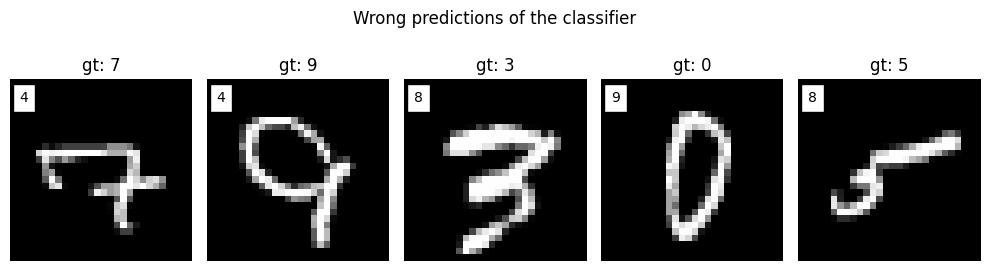

In [12]:
svm_pred = svm.predict(X_test)
plot_errors(X_test, y_test, svm_pred)
# plot_confusion_matrix(lr, svm_pred, y_test)

### KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_scores = fit_validate(knn, X_train, X_test, y_train, y_test, n_jobs=14)
check_is_fitted(knn)
print("Mean acc is: %1.2f" % (np.mean(knn_scores)))

Mean acc is: 0.92


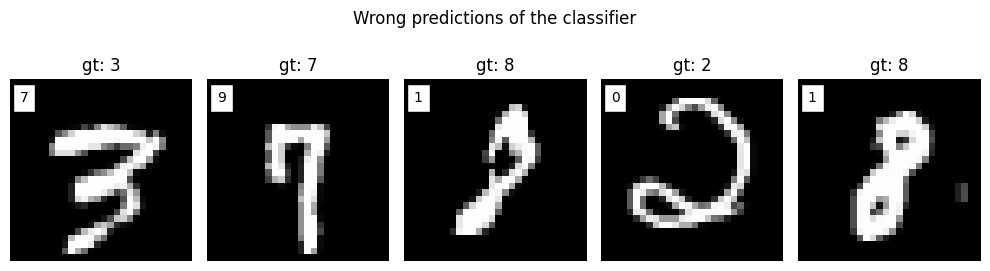

In [14]:
knn_pred = knn.predict(X_test)
plot_errors(X_test, y_test, knn_pred)
# plot_confusion_matrix(lr, knn_pred, y_test)